In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [3]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

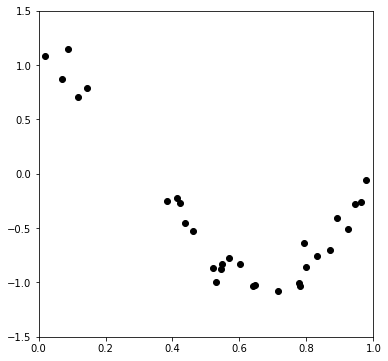

In [5]:
# Plot outputs
plt.figure(figsize=(6, 6))
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([-1.5, 1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

Podziel dane na dwie grupy.

In [13]:
mask = np.random.random_sample(n_samples)
mask = np.where(mask < 0.5, 0, 1)

In [14]:
mask

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0])

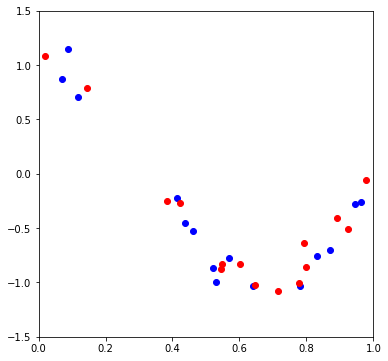

In [22]:
X1 = X[mask==1]
y1 = y[mask==1]
X2 = X[mask==0]
y2 = y[mask==0]

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:

* liniową
* wielomianową stopnia 20

w każdej z grup.

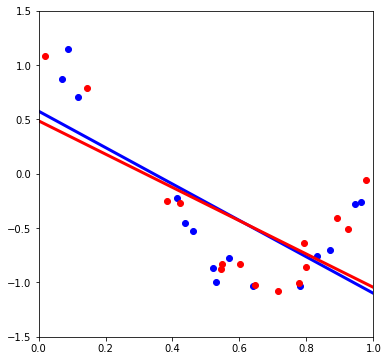

In [29]:
model1 = linear_model.LinearRegression()
model1.fit(np.vstack(X1), y1)

model2 = linear_model.LinearRegression()
model2.fit(np.vstack(X2), y2)

# Plot outputs
plt.figure(figsize=(6, 6))
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([-1.5, 1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_plot = np.vstack(np.linspace(0, 1, 100))
plt.plot(x_plot, model1.predict(x_plot), color='blue',linewidth=3)
plt.plot(x_plot, model2.predict(x_plot), color='red',linewidth=3)
x_tr = np.linspace(0, 1, 200)
plt.show()

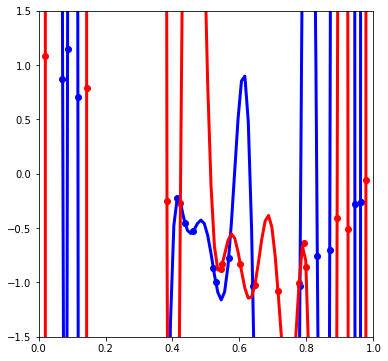

In [34]:
model1 = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression(n_jobs=-1))
model1.fit(np.vstack(X1), y1)

model2 = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression(n_jobs=-1))
model2.fit(np.vstack(X2), y2)

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_plot = np.vstack(np.linspace(0, 1, 100))
plt.plot(x_plot, model1.predict(x_plot), color='blue',linewidth=3)
plt.plot(x_plot, model2.predict(x_plot), color='red',linewidth=3)
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj 100 podziałów na dwie równe części. Za każdym razem naucz regresję:

* liniową
* wielomianową stopnia 1, 2, 3, 4, 5, 6

na jednym fragmęcie i policz R_square na drugim.
Zwizualizuj wynik.


In [37]:
result1 = []
result2 = []
result3 = []
result4 = []
result5 = []
result6 = []

for _ in range(100):
    mask = np.random.random_sample(n_samples)
    mask = np.where(mask < 0.5, 0, 1)
    X1 = X[mask==1]
    y1 = y[mask==1]
    X2 = X[mask==0]
    y2 = y[mask==0]
    
    for i in range(1, 7):
        model = make_pipeline(PolynomialFeatures(i), linear_model.LinearRegression())
        model.fit(np.vstack(X1), y1)
        eval(f"result{i}").append(metrics.r2_score(y2, model.predict(X2.reshape(-1, 1))))

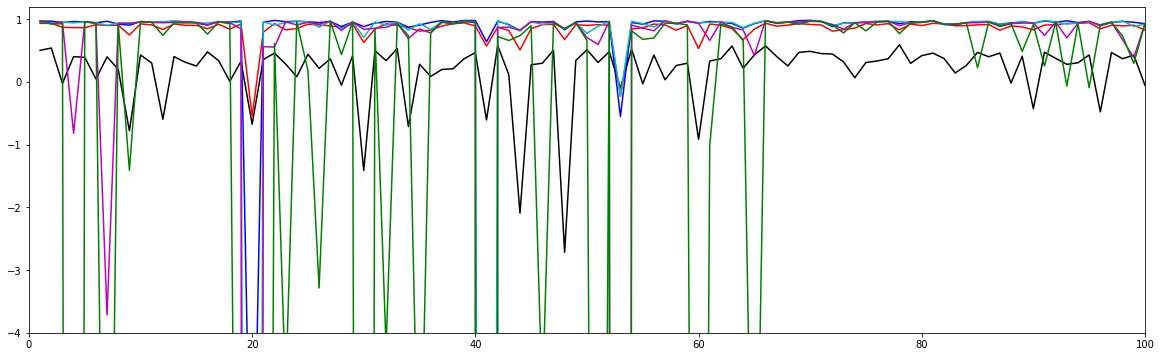

In [38]:
plt.figure(figsize=(20, 6))
axes = plt.gca()
axes.set_xlim([0, 100])
axes.set_ylim([-4, 1.2])
plt.plot(range(1, 101), result1, 'k')
plt.plot(range(1, 101), result2, 'r')
plt.plot(range(1, 101), result3, 'b')
plt.plot(range(1, 101), result4, 'c')
plt.plot(range(1, 101), result5, 'm')
plt.plot(range(1, 101), result6, 'g')
plt.show()